In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,roc_curve,auc

# 인공신경망

## (1)데이터 구성

In [2]:
df_raw=pd.read_csv("/Users/lee/Week3/HMEQ.csv",engine="python",encoding='cp949')
df_raw.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


## (2) 결측치 처리

In [3]:
#결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other",inplace=True)
df_raw.fillna(df_raw.mean(),inplace=True)

## (3) 더미변수 생성

In [5]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
df_raw=df_raw_dummy
df_raw_y=df_raw["BAD"]
df_raw_x=df_raw.drop("BAD",axis=1,inplace=False)

## (4) 데이터 분할

In [37]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.4,random_state=1234)

## (5) MLPClassifier 모델 생성

In [38]:
nn_uncustomized=MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy on training set:{:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.909
Accuracy on test set:0.907


## (6) Hidden layer parameter 조정

In [9]:
train_accuracy=[];test_accuracy=[];
para_hidden =[hidden*20 for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["Hiddenlayer"]=para_hidden
df_accuracy_hidden["Train Accuracy"]=train_accuracy
df_accuracy_hidden["Test Accuracy"]=test_accuracy
df_accuracy_hidden.round(3)

,Hiddenlayer,Train Accuracy,Test Accuracy
0,20,0.906,0.903
1,40,0.886,0.879
2,60,0.909,0.908
3,80,0.910,0.909
4,100,0.722,0.683
5,120,0.909,0.909
6,140,0.213,0.193
7,160,0.909,0.908


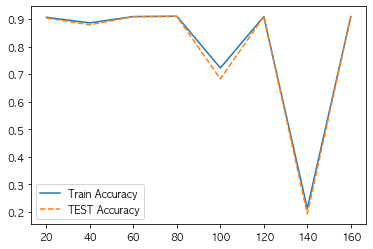

In [10]:
plt.plot(para_hidden,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## (7) Activation : 활성화 함수 parameter 조정

In [11]:
train_accuracy=[];test_accuracy=[];
para_function =['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(activation=v_function,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["Train Accuracy"]=train_accuracy
df_accuracy_function["Test Accuracy"]=test_accuracy
df_accuracy_function.round(3)

,ActivationFunction,Train Accuracy,Test Accuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.722,0.683


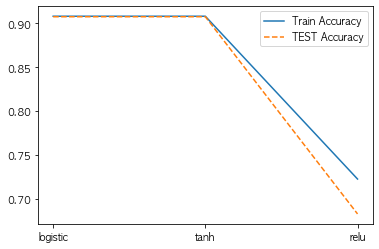

In [12]:
plt.plot(para_function,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## (8) scale 변화

In [13]:
v_feature_name=df_train_x.columns

scaler=StandardScaler()

df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [14]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (2623, 18)
train data Y size : (1125, 18)


## (9) MLP 새로운 모델 생성

In [15]:
nn_scaled=MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.971
Accuracy on test set:0.943


## (10) Hidden layer 파라미터 조정

In [ ]:
train_accuracy=[];test_accuracy=[];
para_hidden =[hidden*20 for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["Hiddenlayer"]=para_hidden
df_accuracy_hidden["Train Accuracy"]=train_accuracy
df_accuracy_hidden["Test Accuracy"]=test_accuracy
df_accuracy_hidden.round(3)

In [ ]:
plt.plot(para_hidden,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## (11) Activation : 활성화 함수 parameter 조정

In [39]:
train_accuracy=[];test_accuracy=[];
para_function =["logistic","tanh","relu"]

for v_function in para_function:
    nn = MLPClassifier(activation=v_function,hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["Train Accuracy"]=train_accuracy
df_accuracy_function["Test Accuracy"]=test_accuracy
df_accuracy_function.round(3)

ValueError: Found input variables with inconsistent numbers of samples: [2623, 2248]

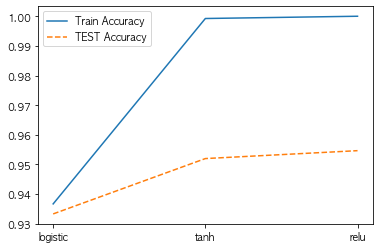

In [23]:
plt.plot(para_function,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## (12) solver : 가중치 최적화 변경

In [28]:
train_accuracy=[];test_accuracy=[];
para_solver =["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver,activation='relu',hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["Train Accuracy"]=train_accuracy
df_accuracy_solver["Test Accuracy"]=test_accuracy
df_accuracy_solver.round(3)

,Solver,Train Accuracy,Test Accuracy
0,lbfgs,1.000,0.948
1,sgd,0.934,0.928
2,adam,1.000,0.955


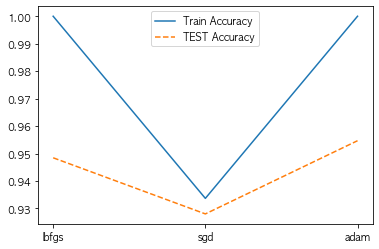

In [29]:
plt.plot(para_solver,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_solver,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [30]:
df_accuracy_solver.round(3)

,Solver,Train Accuracy,Test Accuracy
0,lbfgs,1.000,0.948
1,sgd,0.934,0.928
2,adam,1.000,0.955


## (13) mini batch 변경

In [32]:
train_accuracy=[];test_accuracy=[];
para_batch =[20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch,solver='adam',activation='relu',hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini Batch"]=para_batch
df_accuracy_batch["Train Accuracy"]=train_accuracy
df_accuracy_batch["Test Accuracy"]=test_accuracy
df_accuracy_batch.round(3)

,Mini Batch,Train Accuracy,Test Accuracy
0,20,1.0,0.959
1,40,1.0,0.956
2,60,1.0,0.950
3,80,1.0,0.952
4,100,1.0,0.952
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.954
8,180,1.0,0.956


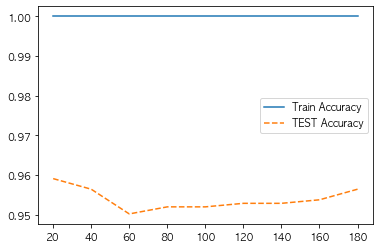

In [33]:
plt.plot(para_batch,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_batch,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [34]:
df_accuracy_batch.round(3)

,Mini Batch,Train Accuracy,Test Accuracy
0,20,1.0,0.959
1,40,1.0,0.956
2,60,1.0,0.950
3,80,1.0,0.952
4,100,1.0,0.952
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.954
8,180,1.0,0.956


## (14) 최종 모델 선택

In [36]:
nn_final=MLPClassifier(hidden_layer_sizes=(80,80),activation='relu',solver='adam',batch_size=100,random_state=1234)
nn_final.fit(df_scaled_train_x,df_train_y)

y_pred=nn_final.predict(df_scaled_test_x)
print("Accuracy on training set:{:.3f}.".format(nn_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}.".format(nn_final.score(df_scaled_test_x,df_test_y)))
print("confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:1.000.
Accuracy on test set:0.952.
confusion matrix:
[[1018    3]
 [  51   53]]
